⚠️ If the generated code snippets do not work, please open an issue https://issues.hubocean.earth/form/f57a63fa-20d2-4268-af79-41eca8f374cd 🙏

In [ ]:
!pip install -U odp-sdk --quiet && pip list | grep odp
!pip install -U pydeck --quiet && pip list | grep pydeck

## 1.1 Setup ODP Client

In [ ]:
from odp.client import OdpClient # The SDK
import pandas as pd
import pydeck as pdk
from helper_functions import convert_geometry_field, wkt_to_edges

### 1.1.2 Geometric Plot Helper

In [ ]:
# loading a simple function to make a nice map display of points
def simple_pydeck_plot(geojson_lists, size=1, lat=0, lon=0, zoom=2):
    colors = [(3, 255, 209), (255, 216, 11), (157, 89, 244), (254, 119, 76)]  # Cyan, Yellow, Purple, Orange
    layers = []
    for i, geojson_list in enumerate(geojson_lists):
        layer = pdk.Layer("GeoJsonLayer", data=convert_geometry_field(geojson_list), lineWidthMinPixels=size, pointRadiusMinPixels=size, pickable=True, get_line_color=colors[i % len(colors)], get_fill_color=colors[i % len(colors)],)
        layers.append(layer)
    r = pdk.Deck(layers=layers, initial_view_state=(pdk.ViewState(latitude=lat, longitude=lon, zoom=zoom)), map_provider="mapbox", map_style='mapbox://styles/oceandatafoundation/clwg6xklg00an01pcgmeufjxq', api_keys={'mapbox': 'pk.eyJ1Ijoib2NlYW5kYXRhZm91bmRhdGlvbiIsImEiOiJjazk5bGxpNWkwYWU1M2Vya3hkcHh4czdrIn0.yf7kIiPfDNE7KP9_9wTN6A'})
    return r

In [ ]:
client = OdpClient()

## 2.1 Fetch Metadata from Catalog
- Option 1) via API calls to the catalog
- Option 2) getting UUID or qualified name from the landing page:
https://app.hubocean.earth/catalog/dataset/wpi-data
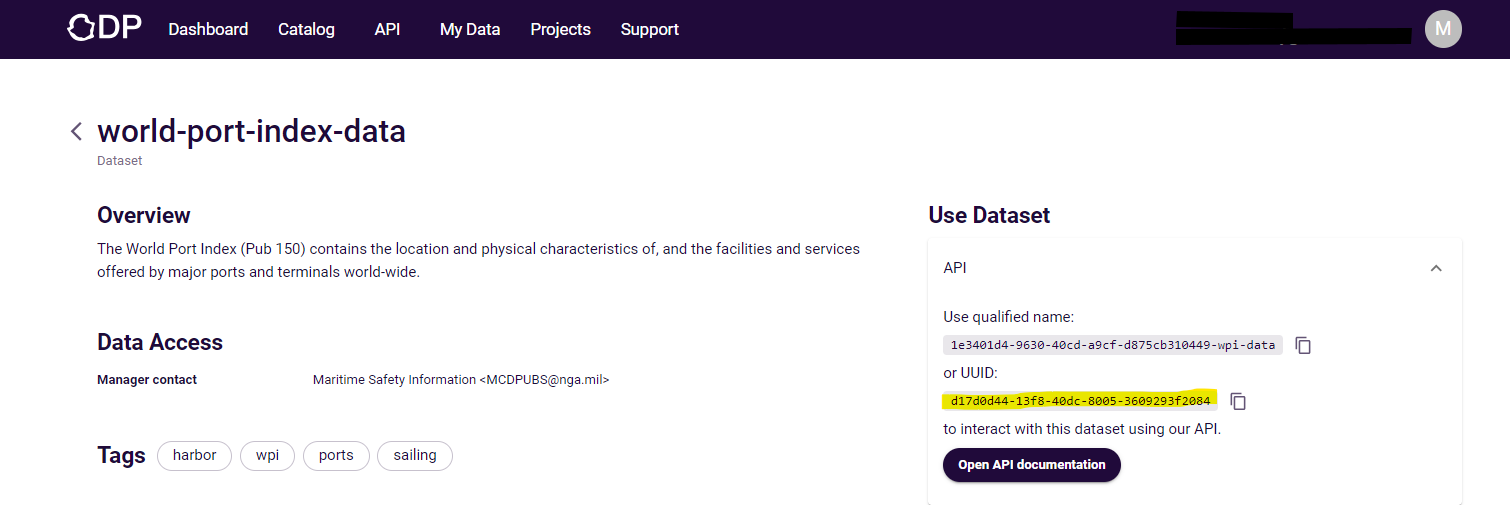

In [ ]:
## Request the dataset from the catalog using the UUID:
wpi_dataset_id = 'a1195213-790e-4171-b70d-44ed42f827f0'
WPI = client.catalog_v2.get_dataset_by_id(wpi_dataset_id)
## Verify the name of the dataset requested
WPI.name

## 2.2 Fetching data

### 2.2.1 Fetching specific columns

In [ ]:
## Request data from the dataset
WPI_dataset = client.table_v2(wpi_dataset_id)
pages = WPI_dataset.select(cols=['Main Port Name', 'geometry']).pages()
WPI_plot_data = [row for page in pages for row in page]

### 4.1.1 Option 1): work with list of datapoints

In [ ]:
WPI_plot_data[1]

## 3.1 Visualize data

### 3.2 Plot datapoints from query on a map

In [ ]:
simple_pydeck_plot([WPI_plot_data], lat=55, lon=7, zoom=1)

## 4.1 Inspect data

### 4.1.2 Option 2): convert from the list to a pandas dataframe

In [ ]:
WPI_data_df = pd.concat(WPI_dataset.select().dataframes(), ignore_index=True)
WPI_data_df.head()

## 5.1 Test a geospatial query of a bounding box

### 5.1.1 Create bounding box for query

In [ ]:
from shapely.geometry import Polygon, mapping, LineString

coords = [
    [21.100000, 69.652500],  
    [23.467351, 70.086159],  
    [17.412649, 70.086159], 
    [16.780000, 69.652500],  
    [14.412649, 67.218841], 
    [20.467351, 68.218841],  
    [21.100000, 69.652500]   
]



coast_poly = Polygon(coords)
geospatial_query = coast_poly.wkt
bbox_list = wkt_to_edges(geospatial_query)


In [ ]:
geospatial_query

### 5.2.1 Query the data based on a bounding box

In [ ]:
WPI_subset = WPI_dataset.select(f"geometry within '{geospatial_query}'").pages()
WPI_data_subset = [row for page in WPI_subset for row in page]

### 5.2.2 Plot the data and bounding box

In [ ]:
# viewing the geospatial subset
simple_pydeck_plot([WPI_data_subset, bbox_list], size=3, lat=69.60, lon=18.57, zoom=5)